# Chapter 11 - Statistics
통계분석

In [1]:
# 정규성 검정 : 시계열 수익률에 대한 정규성 검정
# 포트폴리오이론 : 투자와 관계된 주관적/경험적 판단을, 수학적/통계적 방법으로 대체
# 주성분 분석 : 수많은 시계열 성분중, 소수의 선형/독립적 (또는 상관성 없는) 성분을 구별해 복잡도를 줄인다
# 베이즈 회귀 : 확률의 주관적 척도와 이를 계속적 갱신

<br></br>
## 1 정규성 검정
주식시장의 수익률이 정규분포를 이룬다

In [2]:
# 포트폴리오 이론 : 주식수익률은 정규분포를 구성하므로, 평균수익/ 수익의분산/ 주신사이의 공분산을 고려하여 투자를 결정
# 효율적 시장 가설 : 모든 정보는 시장참여자에게 공유가 되고, 수익률은 정규분포로 수렴한다
# 옵션 가격결정 모형 : 브라운 운동모형에 따른 정규분포 수익률을 형성한다
# 자본자산 가격결정 모형 : 수익률이 정규분포를 구성하면, 개별 주식의 가격과 전체 지수의 관계를 Beta 값으로 측정가능

### 01 벤치마크 자료 분석
기하 브라운 운동경로에 따른 분석

In [3]:
# 로그 정규분포 수익률
# 시간 s 와 t (0< s< t) 사이의, 로그 수익률 log(St/Ss) = log St - log Ss 정규분포를 이룬다
# 로그 정규분포 값
# 임의의 시간 t > 0 에서 St의 값은 '로그 정규분포'를 이룬다

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm

In [5]:
# 기하 브라운 운동모형에 대한 '몬테카를로 경로'를 생성
# < Parameter >
# S0 : 초기 가격 (float)
# r : 고정 단기 이자율 (float)
# sigma : 고정 변동성 (float)
# T : 만기 기간 (float)
# M : 시간 이산 구간의 수 (int)
# I : 생성한 경로의 수 (int)
# < Returns >
# paths : 주어진 인수값 (ndarray, shape (M + 1, I))

In [6]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [7]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

paths = gen_paths(S0, r, sigma, T, M, I)
paths.shape
# 시간구간 : 50단계
# 시뮬레이션 : 250,000 횟수만큼 반복한다

(51, 250000)

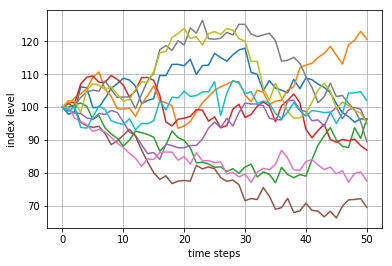

In [8]:
# 10개의 기하 브라운 운동 시뮬레이션 경로
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps'); plt.ylabel('index level')

In [9]:
paths[:, 0].round(4)  # 변환 전 원본데이터

array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

In [10]:
# 로그 수익룰 분포로 자료를 변환
# 1번쨰 array는 초기값 100 으로 일원화 되어있어, 이를 제외한 나머지를 log로 변환한다
log_returns = np.log(paths[1:] / paths[0:-1]) 
log_returns[:, 0].round(4)  # log 변환데이터

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [11]:
# < Parameters >
# array: 통계치를 계산할 자료  (object)
# scs.describe() 결과를 보기좋게 재정렬

def print_statistics(array):
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [12]:
print_statistics(log_returns.flatten()) # .flatten() : Matrix 를 1차원 array로 변환

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


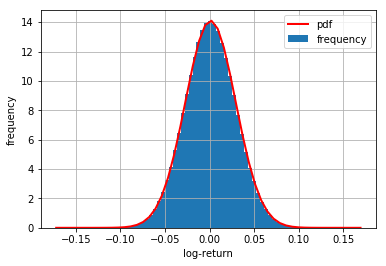

In [13]:
# 로그 수익률의 히스토그램과 정규분포 밀도함수 시각화
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return'); plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0, label='pdf')
plt.legend()

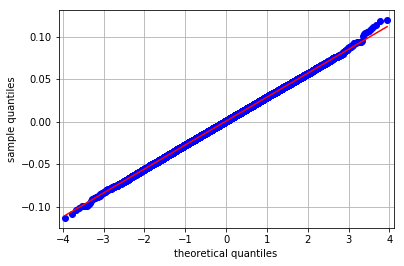

In [14]:
# 위 결과/ 정규성과 유사과 차이가 크게 두드러 지지 않는 한계가 존재
# 떄문에 Q-Q 플롯으로 샘플 분위수와 정규분포상의 분위수를 직선으로 비교하면 차이가 두드러 진다

# 로그 수익률의 분위수 대조도 (Q-Q plot)
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

### 02 통계적 검정
nomality_test를 활용한 (log 변환) 통계적 검정

In [15]:
# 왜도 검정 skew-test : 샘플자료의 왜도가 정규분포와 일치를 검정한다
# 첨도 검정 kurto-test : 샘플자료의 첨도가 정규분포와 일치를 검정한다
# 정규송 검정 normal-test : 두 검정방법을 조합한다

In [16]:
# 주어진 데이터가 정규분포여부를 검정
# array : 통계치를 생성할 대상 (ndarray : object)

def normality_tests(arr):
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])
    
normality_tests(log_returns.flatten())

Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Norm test p-value          0.607


In [17]:
# 검정결과
# p-value(유의 확률) 이 0.05 이상이므로, 로그 수익률은 정규분포를 나타낸다

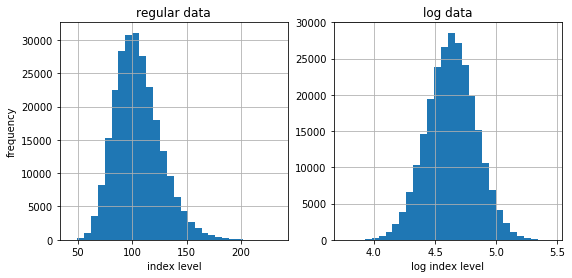

In [18]:
# 시뮬레이션 만기의 값 히스토그램
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level'); ax1.set_ylabel('frequency')
ax1.set_title('regular data')

ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level'); ax2.set_title('log data')

In [19]:
# 측정값을 통계적 검정
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [20]:
# 로그 변환한 값을 통계적 검정
# 검정결과, 외도/ 첨도의 값ㅇ느 0으로 수렴한다
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [21]:
# 높은 유의 확률값을 통해 정규분포 가설의 검증이 가능하다
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.851
Kurt of data set          -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


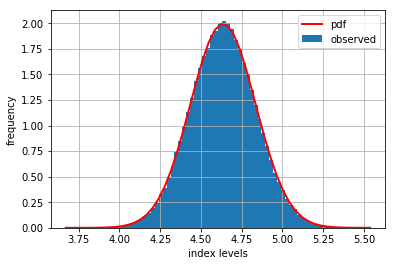

In [22]:
# 로그 변환값의 히스토그램과 정규분호 확률밀도함수를 비교
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf')
plt.legend()

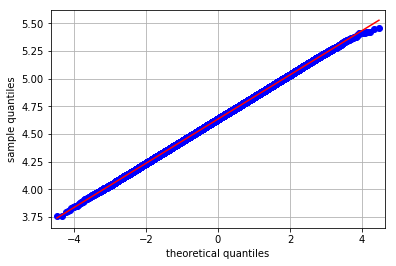

In [23]:
# Quantile-quantile plot for log index levels
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

### 03 현실 자료 분석
시계열 데이터 분석 , Real World Data

In [24]:
# 주가 데이터 불러오기
import pandas as pd
from pandas_datareader import get_data_google

symbols = ['SPY', 'GLD', 'YHOO', 'MSFT']
data = pd.DataFrame()

for sym in symbols:
    data[sym] = get_data_google(sym, '2006/01/01')['Close']

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2936 entries, 2006-01-03 to 2017-09-05
Data columns (total 4 columns):
SPY     2936 non-null float64
GLD     2936 non-null float64
YHOO    2936 non-null float64
MSFT    2936 non-null float64
dtypes: float64(4)
memory usage: 114.7 KB


In [25]:
data.head()

,SPY,GLD,YHOO,MSFT
Date,,,,
2006-01-03,126.70,53.12,40.91,26.84
2006-01-04,127.30,53.30,40.97,26.97
2006-01-05,127.38,52.34,41.53,26.99
2006-01-06,128.44,53.72,43.21,26.91
2006-01-09,128.77,54.60,43.42,26.86


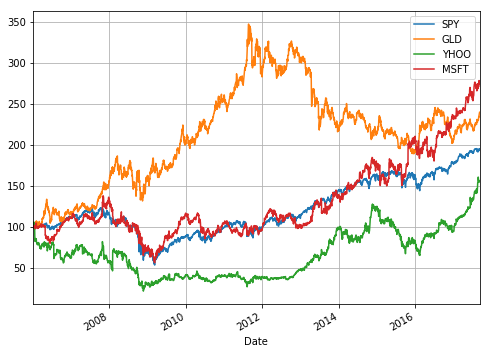

In [26]:
# 시간에 따른 수식과 지수의 변화
(data / data.ix[0] * 100).plot(figsize=(8, 6), grid=True)

In [27]:
# 수익률 log 변환 분석
# data.shift(1) : 전체 데이테를 1단계씩 미룬다
log_returns = np.log(data / data.shift(1))  
log_returns.head()

,SPY,GLD,YHOO,MSFT
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,0.004724,0.003383,0.001466,0.004832
2006-01-05,0.000628,-0.018175,0.013576,0.000741
2006-01-06,0.008287,0.026024,0.039656,-0.002968
2006-01-09,0.002566,0.016249,0.004848,-0.001860


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0bf8246a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe0bf78f518>]], dtype=object)

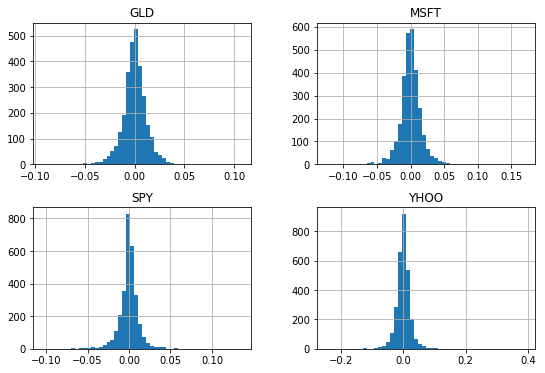

In [28]:
# log 수익률 분포를 히스토그램으로 변환
log_returns.hist(bins=50, figsize=(9, 6))

In [29]:
# 시계열 데이터의 통계치를 연산
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2935.00000
           min        -0.10364
           max         0.13558
          mean         0.00023
           std         0.01236
          skew        -0.10937
      kurtosis        14.38326

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      2935.00000
           min        -0.09191
           max         0.10744
          mean         0.00030
           std         0.01243
          skew        -0.29902
      kurtosis         5.73372

Results for symbol YHOO
------------------------------
     statistic           value
------------------------------
          size      2935.00000
           min        -0.24636
           max         0.39182
          mean         0.00015
           std         0.02427
          skew         0.51240
      kurtosis        32.655

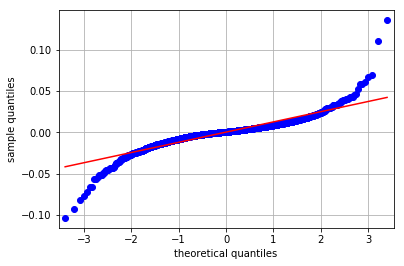

In [30]:
# S&P 500 지수 로그 수익률을 Q-Q plot 으로 시각화
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [31]:
# 시계열 데이터의 경우 Fat tail 현상을 나타난다
# 양쪽의 이상치 outlier 들이 정규분포보다 양수/ 음수인 경우를 반영한 결과이다

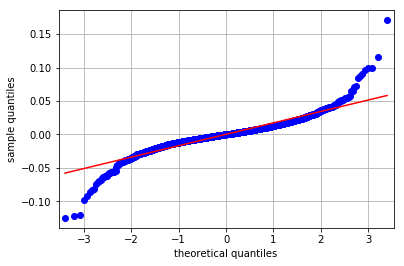

In [32]:
# Quantile-quantile plot for Microsoft log returns
# MSFT 주식의 로그 수익률 Q-Q plot
sm.qqplot(log_returns['MSFT'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [33]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SPY
--------------------------------
Skew of data set          -0.109
Skew test p-value          0.016
Kurt of data set          14.383
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set          -0.299
Skew test p-value          0.000
Kurt of data set           5.734
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol YHOO
--------------------------------
Skew of data set           0.512
Skew test p-value          0.000
Kurt of data set          32.655
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set           0.068
Skew test p-value          0.132
Kurt of data set          10.557
Kurt test p-value          0.000
Norm test p-value          0.000


In [34]:
# 결과
# 유의확률이 0이므로 정규분포 가정을 강력하게 기각한다
# 따라서 주가가 정규분포를 이룬다는 가설을 성립되기 어렵다
# 이를 극복위해 확장된 모형을 사용해야 한다

<br></br>
## 2 포트폴리오 최적화
Portfolio Optimization

In [35]:
# 기말 자산가치의 분포를 묘사하기 위해선 평균, 분산 이외의 어떠한 통계치도 필요없다
# 투자자별 특수한 '효용성 함수(utility function)'를 정의하지 않는한 
# 수익률은 정규분포로 가정하면 된다

### 01 자료분석
the Data

In [36]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# 주가 데이터 불러오기
import pandas as pd
from pandas_datareader import get_data_google

symbols = ['AAPL', 'MSFT', 'YHOO', 'DB', 'GLD']
noa = len(symbols)
data = pd.DataFrame()

for sym in symbols:
    data[sym] = get_data_google(sym, '2006/01/01')['Close']
data.columns = symbols

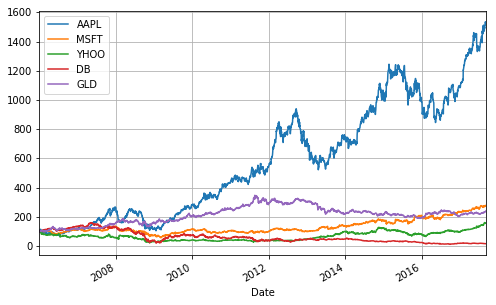

In [38]:
# 시간에 따른 주가의 변화
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)

In [39]:
# log 수익률 평균과 분산
rets = np.log(data / data.shift(1))
rets.mean() * 252

AAPL    0.233357
MSFT    0.086564
YHOO    0.038209
DB     -0.158617
GLD     0.075131
dtype: float64

In [40]:
# 투자자산에 대한 공분한 행렬을 연산한다
rets.cov() * 252

,AAPL,MSFT,YHOO,DB,GLD
AAPL,0.107352,0.038716,0.042258,0.066611,-0.001037
MSFT,0.038716,0.073244,0.035363,0.063195,0.000036
YHOO,0.042258,0.035363,0.148381,0.072209,-0.001488
DB,0.066611,0.063195,0.072209,0.231494,0.002105
GLD,-0.001037,0.000036,-0.001488,0.002105,0.038948


### 02 기초이론
The Basic Theory

rets : log 변환 데이터로 포트폴리오 기초분석

In [41]:
# 0과 1사이의 값 5개를 생성, 
# 총합은 1인, 포트폴리오 비중을 결정
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.0346395 ,  0.02726489,  0.2868883 ,  0.10396806,  0.54723926])

In [42]:
# 포트폴리오 기댓값 : 수익률
# 개별 비중을 반영
# 연이율을 반영하기 위해 * 252 
np.sum(rets.mean() * weights) * 252

0.046028621967965096

In [43]:
# 포트폴리오 기댓값 : 분산
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.032907607250252068

In [44]:
# 포트폴리오 기댓값 : 표준편차(변동성)
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.18140454032424896

In [45]:
prets = []  # 표준편차 : 포트폴리오 수익
pvols = []  # 몬테카를로 시뮬레이션 : 수익의 변동성

for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

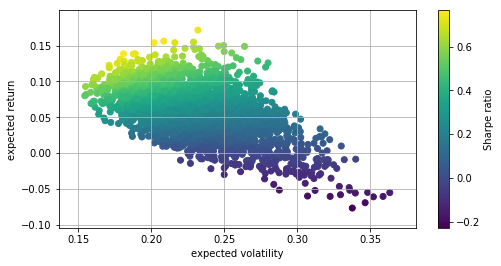

In [46]:
# 샤프지수
# (기대 수익률 - 벤치마크 수익률)의 기대값 / (기대 수익률 - 벤치마크 수익률)의 표준편차
# (무위험 단기 이자율에 대한, 포트폴리오의 초과 수익률 기댓값)
# 값이 클수록, 적은 위험으로 큰 수익을 실현한다
# 다양한 무작위 포트폴리오 비중에 대한 수익률과 변동성 기댓값 (사프지수)시각화

plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c = prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [47]:
# 같은 위험수준에도 다양한 성과들이 측정된다
# 여러 집합 중, 최대수익률을 갖거나, 같은  수익률에 대한 최소 위험의 포트폴리오 집합의 계산이 필요
# 이러한 포트폴리오의 집합을 '04.효율적 투자선'(efficient Frontier) 라고 한다

### 03 포트폴리오 최적화
Portfolio Optimizations

#### 1) 1차적 포트폴리오 최적화
주어진 log 데이터를 기반으로 포트폴리오를 최적화 한다

In [48]:
# 포트폴리오의 통계치를 출력
# Parameters ==========
# weights : 포트폴리오 내 증권의 비율 (array)
# Returns    ==========
# pret : 포트폴리오 기대값, 수익률 (float)
# pvol : 기댓값 변동성 (float)
# pret / pvol : 무위험 이자율 0일떄 샤프지수

def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [49]:
import scipy.optimize as sco

# 샤프지수 연산시, 음수값을 최소화 한다
def min_func_sharpe(weights):
    return -statistics(weights)[2]

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
noa * [1. / noa,]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [50]:
# 함수출력시, 최적 입력변수외 다양한 추가정보를 출력한다
%time 
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
opts

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs


     fun: -0.8130768142844812
     jac: array([ -4.32588160e-04,  -1.58078969e-04,   2.68561549e-01,
         1.60023080e+00,   4.76710498e-04])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  5.19796038e-01,   6.38820899e-03,   9.60603125e-17,
         0.00000000e+00,   4.73815753e-01])

In [51]:
# 위의 최적화 결과중, 필요한 'x'데이터만 추출한다
opts['x'].round(3)

array([ 0.52 ,  0.006,  0.   ,  0.   ,  0.474])

In [52]:
# 최적 포트폴리오 비중을 연산한 통계결과를 출력
# 수익률의 기댓값, 변동성 기댓값, 최적의 샤프지수값 - 3개 array를 출력
statistics(opts['x']).round(3)

array([ 0.157,  0.194,  0.813])

#### 2)  sco.minimize() 를 활용
분산을 최소화 하는 포트폴리오 최적화

In [53]:
# 포트폴리오의 분산을 최소화 하는 함수를 정의한다
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
optv

     fun: 0.022945962610885193
     jac: array([ 0.04584286,  0.04619711,  0.04557876,  0.0559385 ,  0.04582768])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  1.09971665e-01,   2.20391399e-01,   7.57007963e-02,
         4.98732999e-18,   5.93936140e-01])

In [54]:
optv['x'].round(3)

array([ 0.11 ,  0.22 ,  0.076,  0.   ,  0.594])

In [55]:
statistics(optv['x']).round(3)

array([ 0.092,  0.151,  0.609])

### 04 효율적 투자선
목표 수익률을 우선 정한 뒤, 이에 맞는 최적의 조건을 찾는다

In [56]:
# 제약조건
# 목표수익률 값  : trets
# 포트폴리오 비중의 합 : 1
# 기타 제약조건의 포트폴리오 최적 조건과 동일하다

In [57]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [58]:
def min_func_port(weights):
    return statistics(weights)[1]

In [59]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 3.98 s, sys: 0 ns, total: 3.98 s
Wall time: 3.99 s


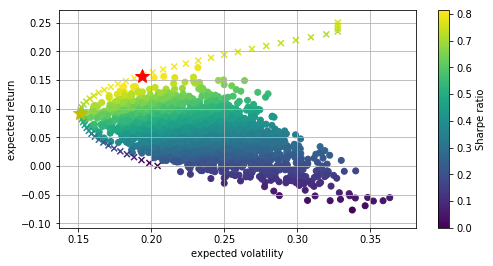

In [60]:
# 주어진 수익률 수준에 대한 최소위험 포트폴리오
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c = prets / pvols, marker='o') # 무작위 포트폴리오
plt.scatter(tvols, trets, c = trets / tvols, marker='x') # 효율적 투자선
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)                          # 최대 샤프지수의 포트폴리오
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)                          # 최소 분산 포트폴리오
plt.grid(True); plt.colorbar(label='Sharpe ratio')
plt.xlabel('expected volatility'); plt.ylabel('expected return')

In [61]:
# 결과
# X points : 효율적 투자선 (최소분산 포트폴리오 보다 수익이 높은 점들)
# 빨간 star : 최대샤프지수를 갖는 포트폴리오

### 05 자본시장선
금, 달러등 '현금/ 현금성 계정'은 위험이 없는 투자기회로 존재한다

이들의 단점은 수익률이 적거나, 0에 가깝다는 점이다